In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

   MCS/RB   1    2    3    4    5    6    7    8    9  ...    91    92    93  \
0       0  32   64   96  128  168  208  240  272  304  ...  3104  3104  3240   
1       1  40   88  128  176  224  272  304  352  408  ...  3976  4040  4104   
2       2  48  104  160  224  272  320  384  432  504  ...  4872  5000  5000   
3       3  64  136  208  288  352  432  504  576  640  ...  6408  6536  6536   
4       4  80  168  256  352  432  528  608  704  808  ...  7808  7936  8064   

     94    95    96    97    98    99   100  
0  3240  3240  3240  3368  3368  3368  3368  
1  4104  4232  4232  4232  4360  4360  4360  
2  5128  5128  5256  5256  5256  5384  5384  
3  6664  6664  6792  6792  6920  6920  7048  
4  8064  8192  8192  8456  8456  8456  8712  

[5 rows x 101 columns]


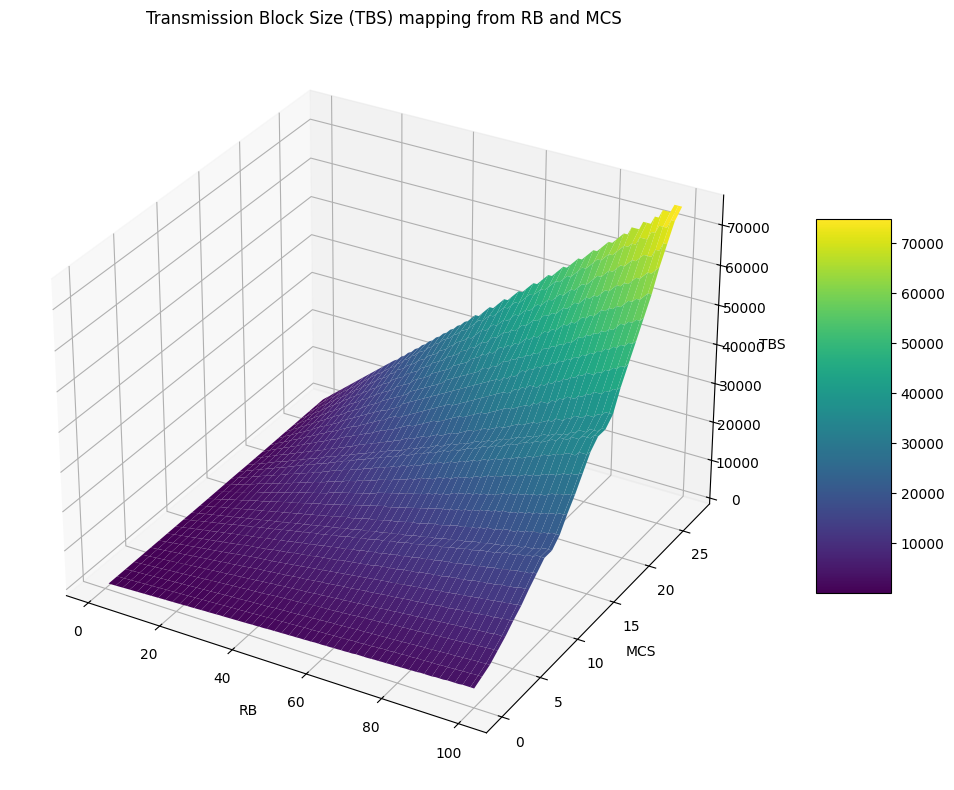

In [5]:
TBS = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/TBSArray.csv')

print(TBS.head(5))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 101)  # RB
Y = np.arange(0, 28)   # MCS
X, Y = np.meshgrid(X, Y)
Z = TBS.iloc[:, 1:].astype(float).values

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('RB')
ax.set_ylabel('MCS')
ax.set_zlabel('TBS')
ax.set_title('Transmission Block Size (TBS) mapping from RB and MCS')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [15]:
# Burst Traffic
RoundRobin_BurstTraffic = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/burst_traffic/rr.csv')
MaxCQI_BurstTraffic = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/burst_traffic/max_cqi.csv')

# High Traffic
RoundRobin_HighTraffic = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/high_traffic/rr.csv')
MaxCQI_HighTraffic = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/high_traffic/max_cqi.csv')

# Ideal Traffic 100000 bits
RoundRobin_IdealTraffic = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/ideal_condition_bsr100000/rr.csv')
MaxCQI_IdealTraffic = pd.read_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/ideal_condition_bsr100000/max_cqi.csv')

## Burst Traffic

### Round Robin

In [7]:
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
RoundRobin_BurstTraffic_UE = RoundRobin_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)


Avg Throughput for cell: 18.256784 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              2468                25              18.556824       20.0   
UE1              2429                25              18.335128       19.0   
UE2              2382                25              18.167496       21.0   
UE3              2474                25              18.392400       21.0   
UE4              2358                25              18.492352       20.0   
UE5              2362                25              17.992560       20.0   
UE6              2402                25              18.046688       21.0   
UE7              2412                25              18.115152       20.0   
UE8              2477                25              18.304784       20.0   
UE9              2443                25              18.223456       20.0   
UE10             2464                25              18.282816       20.0  

### Max C_I

In [9]:
ue = [col for col in MaxCQI_BurstTraffic.columns if col.startswith('UE')]
MaxCQI_BurstTraffic_UE = MaxCQI_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)


Avg Throughput for cell: 18.668601 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              2347                25              19.042672       77.0   
UE1              2336                25              18.949688       51.0   
UE2              2291                25              18.651264       62.0   
UE3              2359                25              18.878864       74.0   
UE4              2292                25              18.970344       82.0   
UE5              2218                25              18.405360       80.0   
UE6              2264                25              18.398936       98.0   
UE7              2238                25              18.470504      119.0   
UE8              2304                25              18.662736      108.0   
UE9              2250                25              18.579392      116.0   
UE10             2287                25              18.586848      130.0  

## High Traffic

### Round Robin

In [18]:
ue = [col for col in RoundRobin_HighTraffic.columns if col.startswith('UE')]
RoundRobin_HighTraffic_UE = RoundRobin_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

# save summary to CSV
summary.to_csv('/home/lephamcong/VHT2024/CapstoneProject/Simulation/result/high_traffic/rr_HighTraffic_summary.csv')


Avg Throughput for cell: 23.148759 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              23.391728        2.0   
UE1              3334                25              23.060416        2.0   
UE2              3334                25              23.044464        2.0   
UE3              3334                25              23.119264        2.0   
UE4              3333                25              23.046576        2.0   
UE5              3333                25              23.137576        2.0   
UE6              3333                25              23.316240        2.0   
UE7              3333                25              23.067280        2.0   
UE8              3333                25              22.817392        2.0   
UE9              3333                25              23.260560        2.0   
UE10             3333                25              23.200888        2.0  

### Max C/I

In [13]:
ue = [col for col in MaxCQI_HighTraffic.columns if col.startswith('UE')]
MaxCQI_HighTraffic_UE = MaxCQI_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)


Avg Throughput for cell: 29.183687 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              4639                25              39.459264      200.0   
UE1              4075                25              34.948488      180.0   
UE2              3980                25              33.939456      280.0   
UE3              3667                25              31.657208      220.0   
UE4              3688                25              32.122392      180.0   
UE5              3468                25              30.566176      340.0   
UE6              3760                25              33.215360      200.0   
UE7              2981                25              26.271440      240.0   
UE8              2587                25              23.328656      280.0   
UE9              2541                25              23.011968      440.0   
UE10             2332                25              21.044328      460.0  

## Ideal 100000bit

### Round Robin

In [16]:
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
RoundRobin_IdealTraffic_UE = RoundRobin_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)


Avg Throughput for cell: 28.801645 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3220                25              51.511368       15.0   
UE1              3225                25              51.292464       15.0   
UE2              3230                25              51.066464       14.0   
UE3              3141                25              51.098272       14.0   
UE4              4883                25              35.664640        2.0   
UE5              4288                25              31.189072        2.0   
UE6              3845                25              27.658632        2.0   
UE7              3629                25              26.072112        2.0   
UE8              2673                25               4.981416       62.0   
UE9              2577                25               4.869768       80.0   
UE10             2656                25               5.129608       62.0  

### Max CQI

In [17]:
ue = [col for col in MaxCQI_IdealTraffic.columns if col.startswith('UE')]
MaxCQI_IdealTraffic_UE = MaxCQI_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)


Avg Throughput for cell: 33.353317 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3261                25              52.036712       15.0   
UE1              3263                25              51.744784       15.0   
UE2              3288                25              51.800848       15.0   
UE3              3199                25              51.810832       15.0   
UE4              6594                25              48.233024       13.0   
UE5              6576                25              47.867920       14.0   
UE6              6614                25              47.689424       13.0   
UE7              6565                25              47.456112       12.0   
UE8               234                25               0.577512      776.0   
UE9               164                25               0.412720      777.0   
UE10              125                25               0.307600      996.0  

## Low Traffic

### Round Robin

### Max C/I

## Mobility Pattern